Loading dataset from: transactions_data.csv

Transactions dataset loaded successfully!

Loading dataset from: cards_data.csv

Cards data loaded successfully!

Loading dataset from: users_data.csv

Users data loaded successfully!



--- Initial Data Overview: Users Data ---
     id  current_age  retirement_age  birth_year  birth_month  gender  \
0   825           53              66        1966           11  Female   
1  1746           53              68        1966           12  Female   
2  1718           81              67        1938           11  Female   
3   708           63              63        1957            1  Female   
4  1164           43              70        1976            9    Male   

                    address  latitude  longitude per_capita_income  \
0             462 Rose Lane     34.15    -117.76            $29278   
1    3606 Federal Boulevard     40.76     -73.74            $37891   
2           766 Third Drive     34.02    -117.89            $22681   
3      

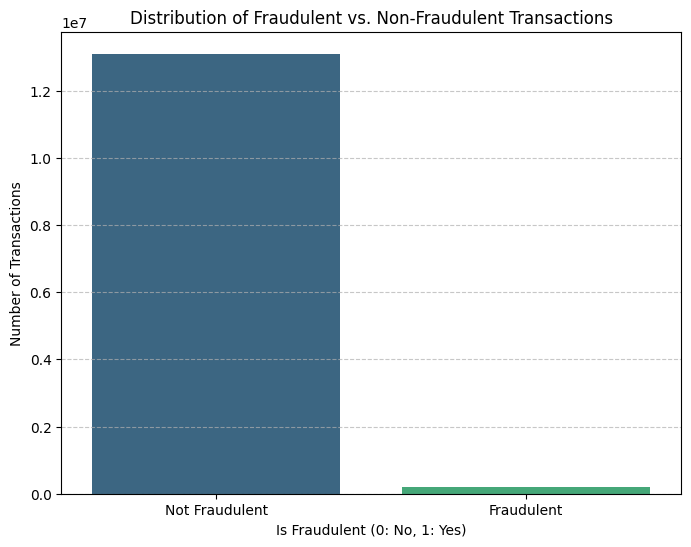



--- Fraudulent Transactions by Originating Gender ---
orig_gender
Female    106953
Male      104440
Name: isFraud, dtype: int32


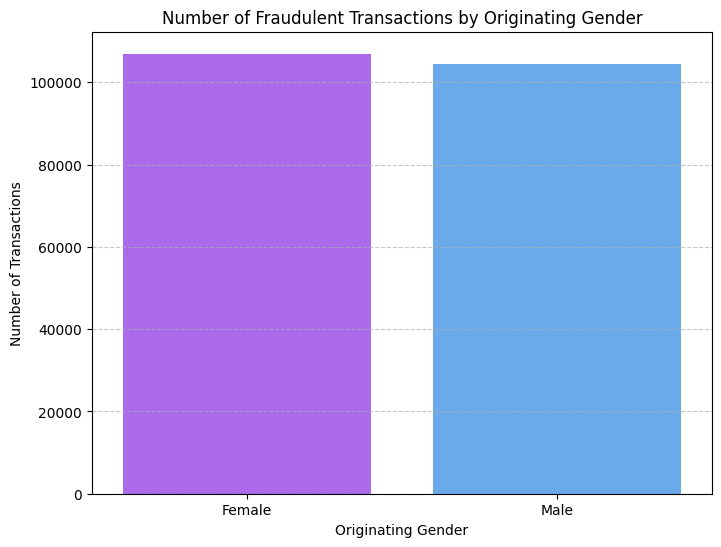


Proportion of Fraud within each Originating Gender:
orig_gender
Male      1.609245
Female    1.569165
Name: isFraud, dtype: float64


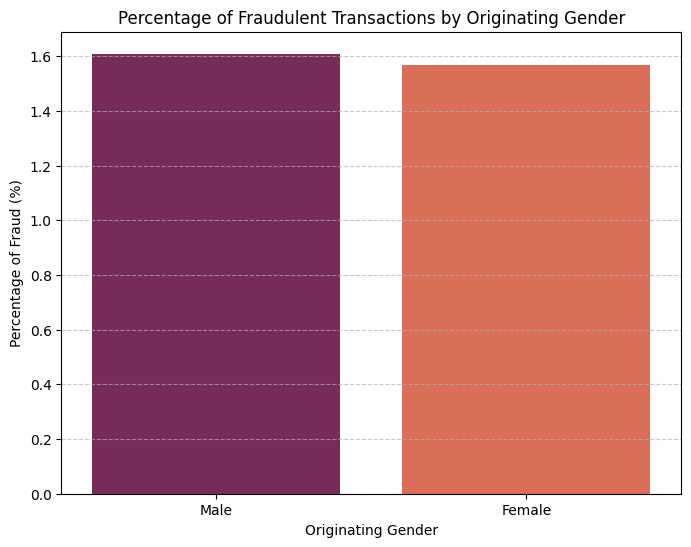



--- Fraud by Originating Number of Cards (from cards_data.csv) ---


c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


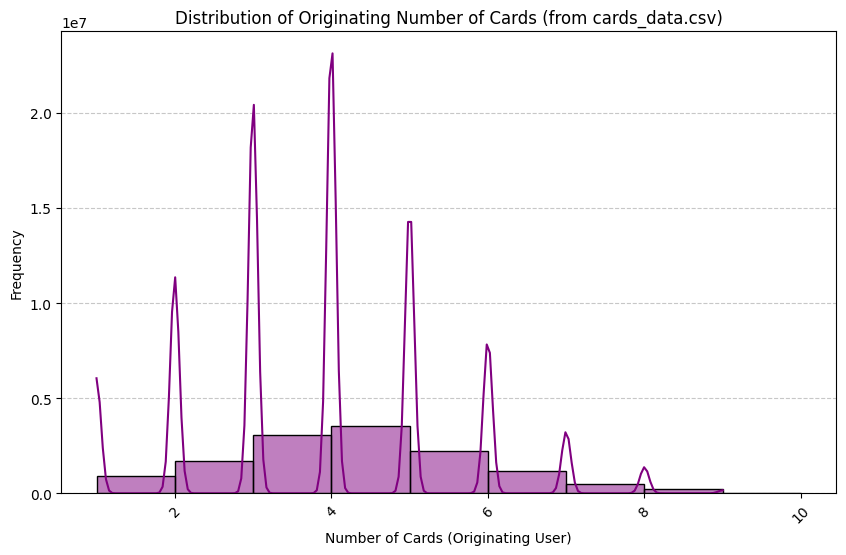

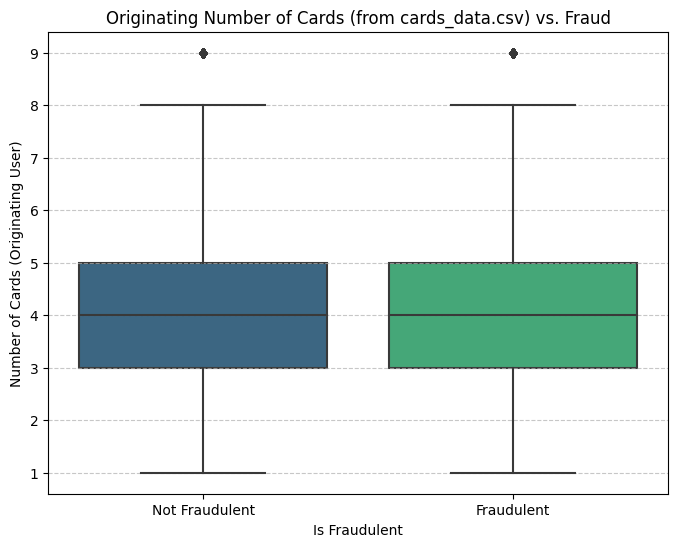



--- Fraud by Originating Most Common Card Type ---


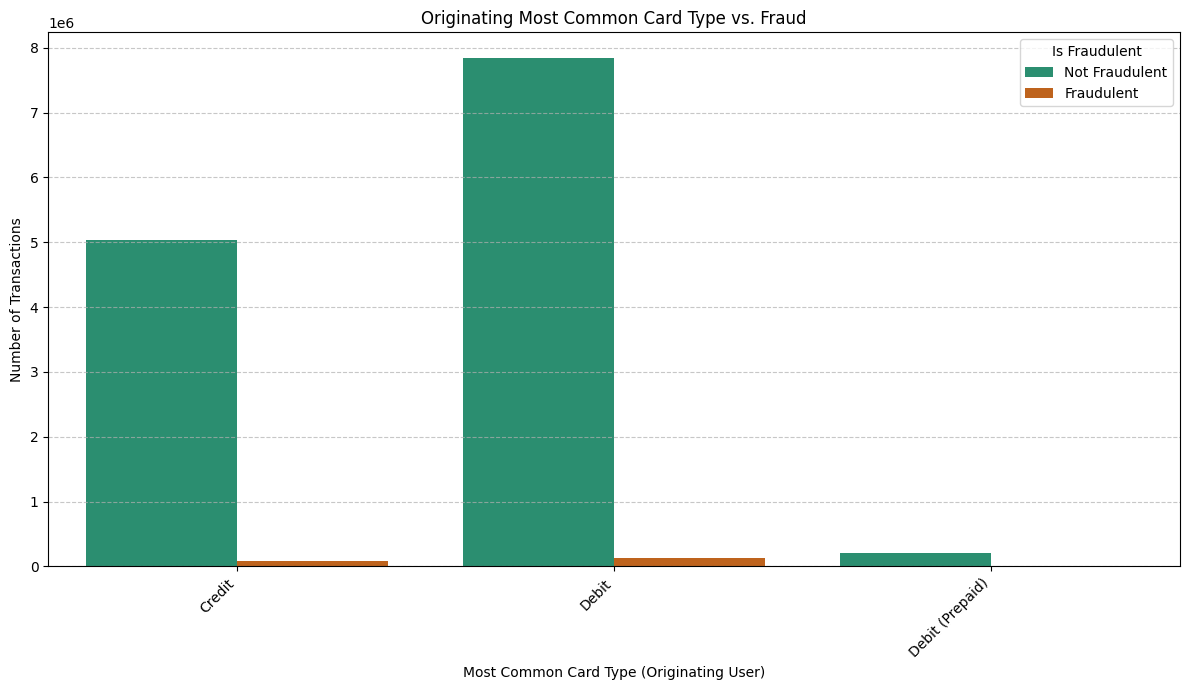


Proportion of Fraud within each Originating Most Common Card Type:
orig_most_common_card_type
Debit              1.636250
Credit             1.519320
Debit (Prepaid)    1.476495
Name: isFraud, dtype: float64


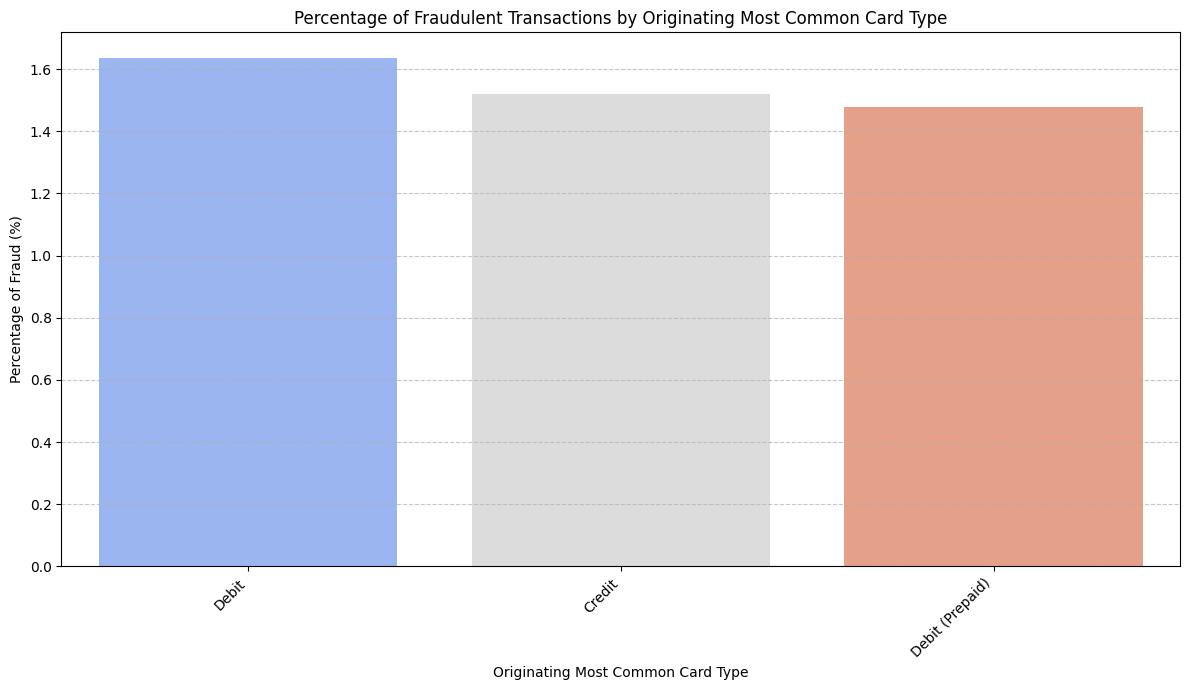



--- Distribution of Numerical Features ---


c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


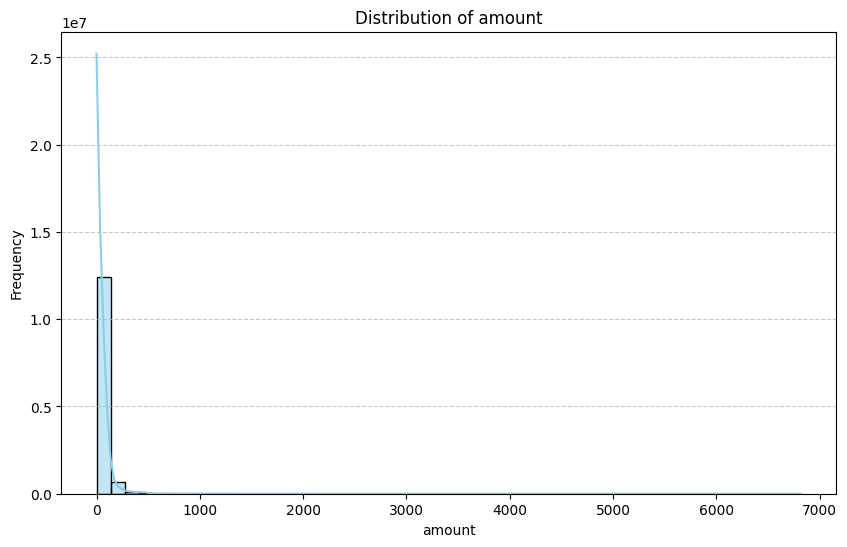

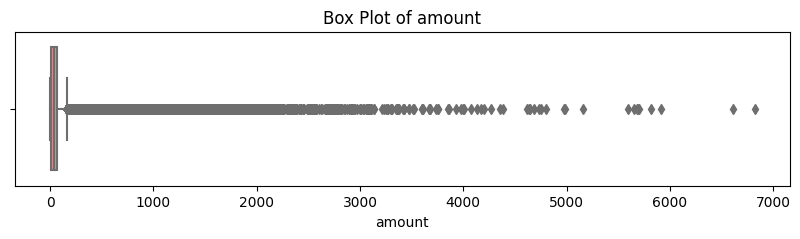

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


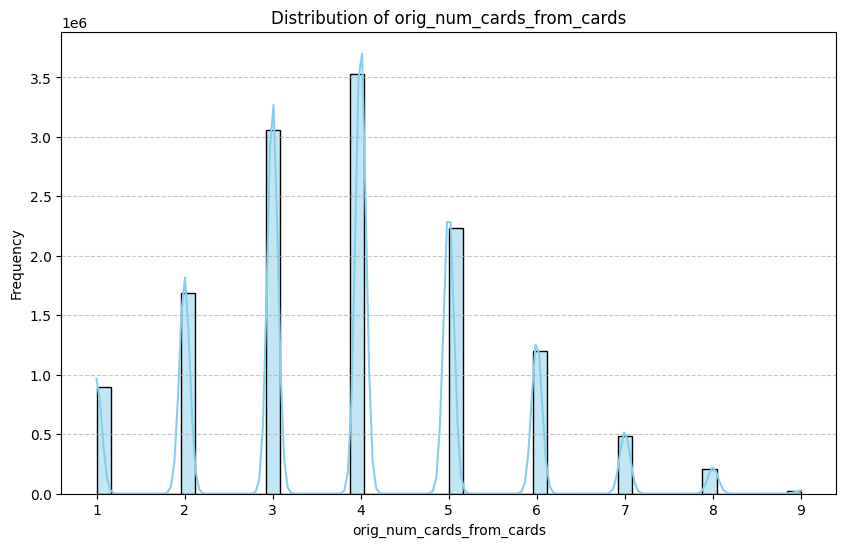

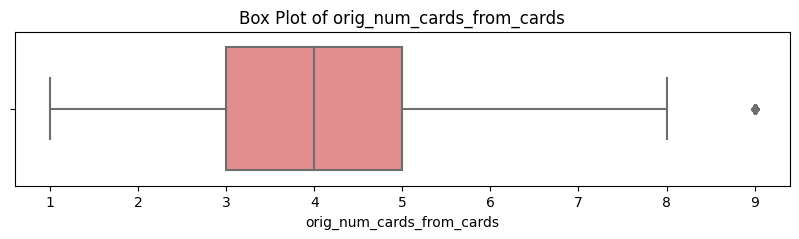

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


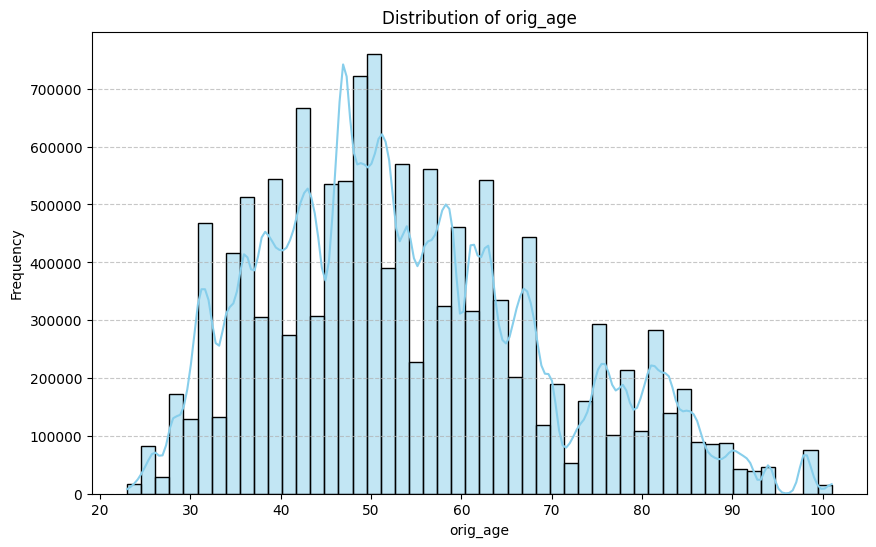

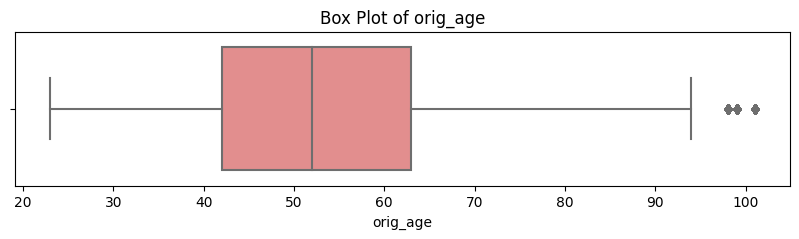

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


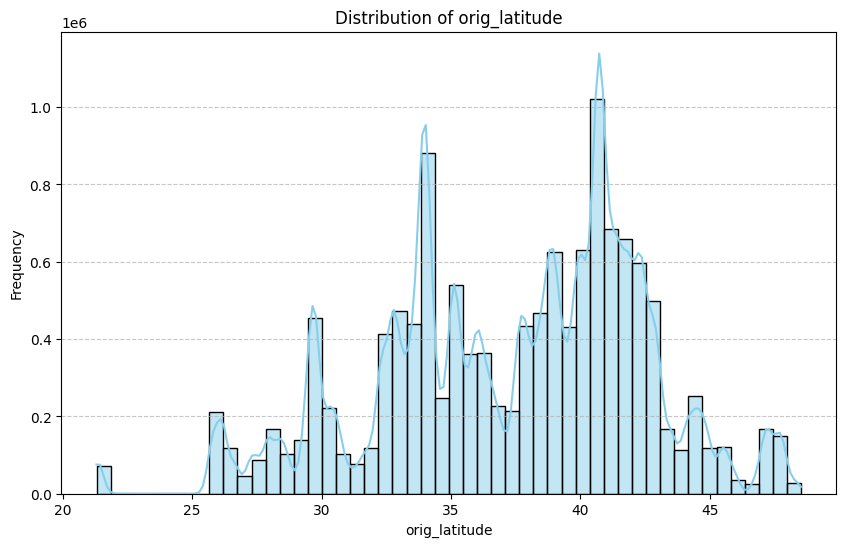

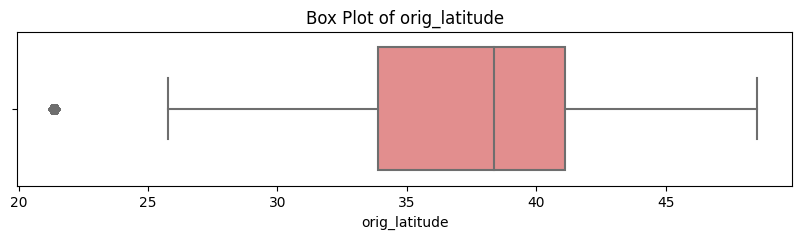

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


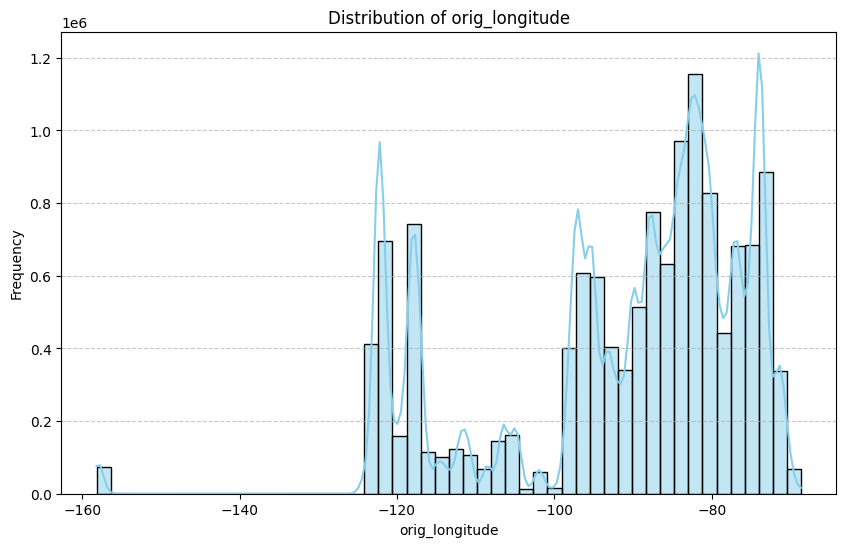

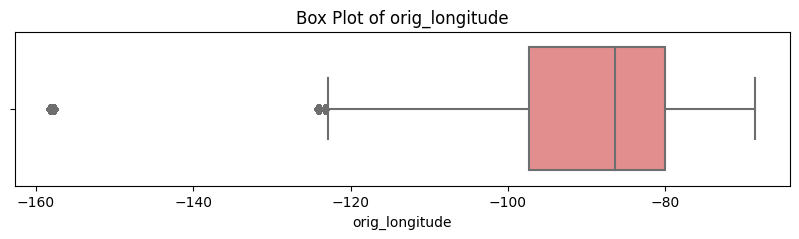

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


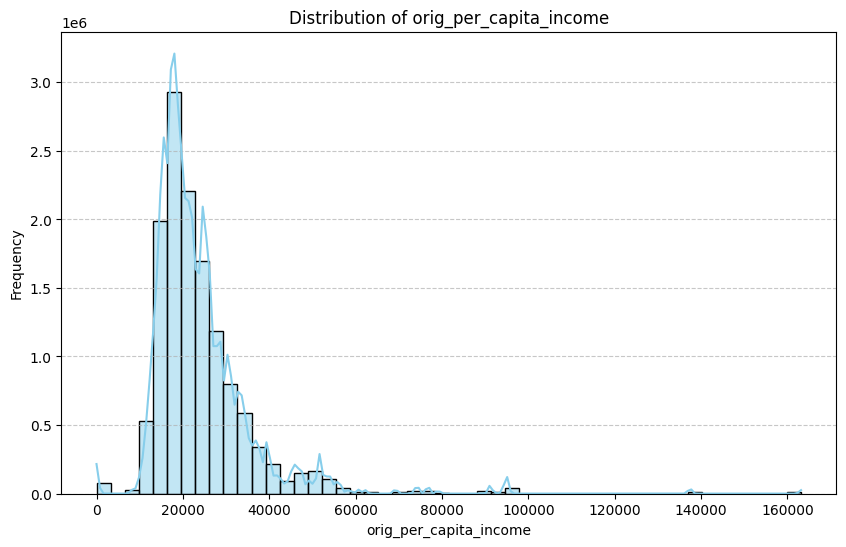

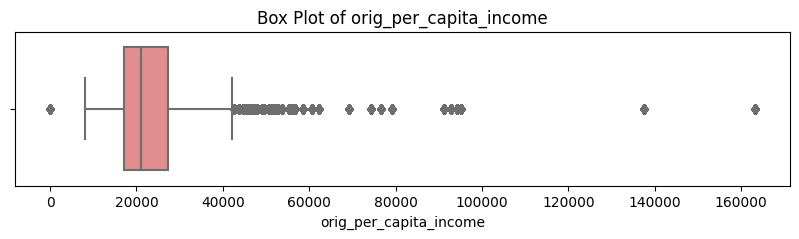

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


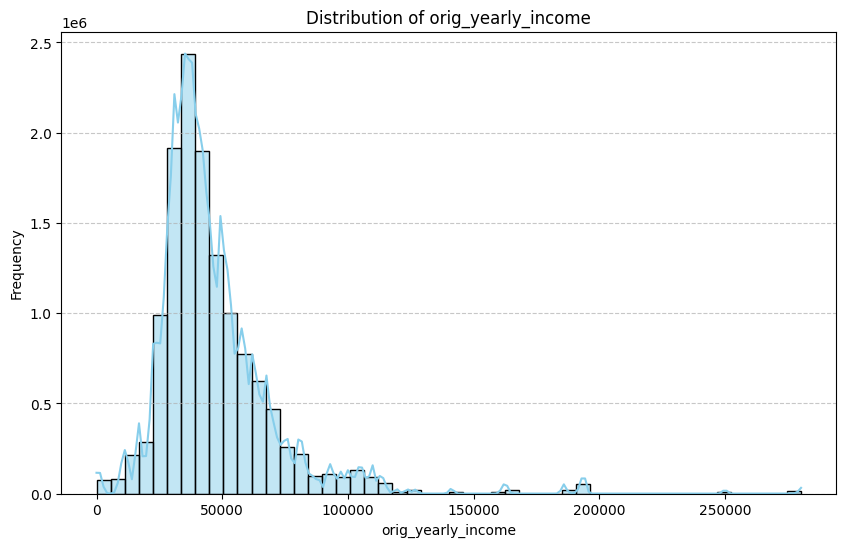

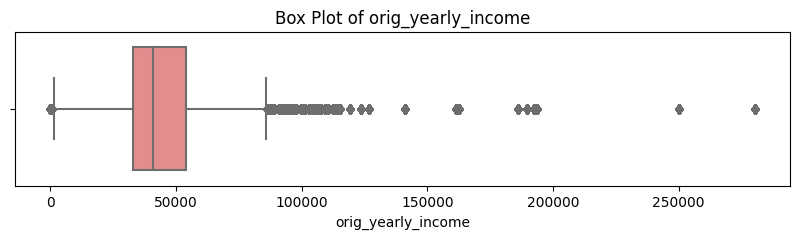

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


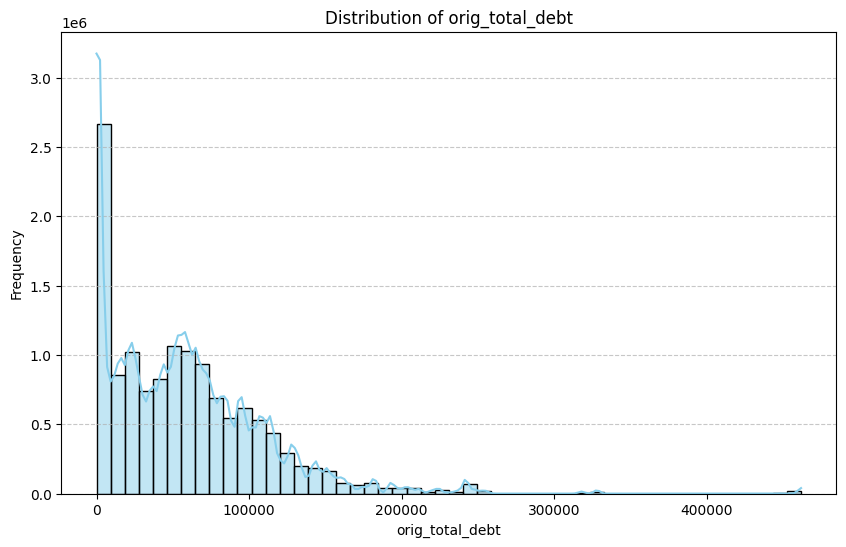

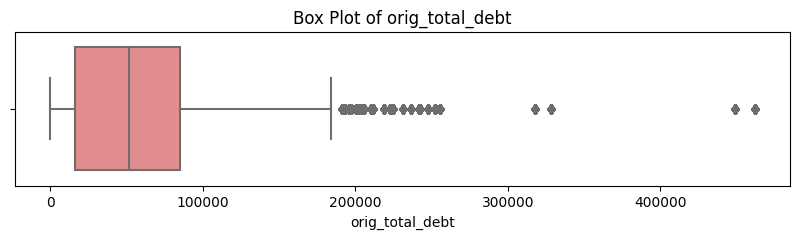

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


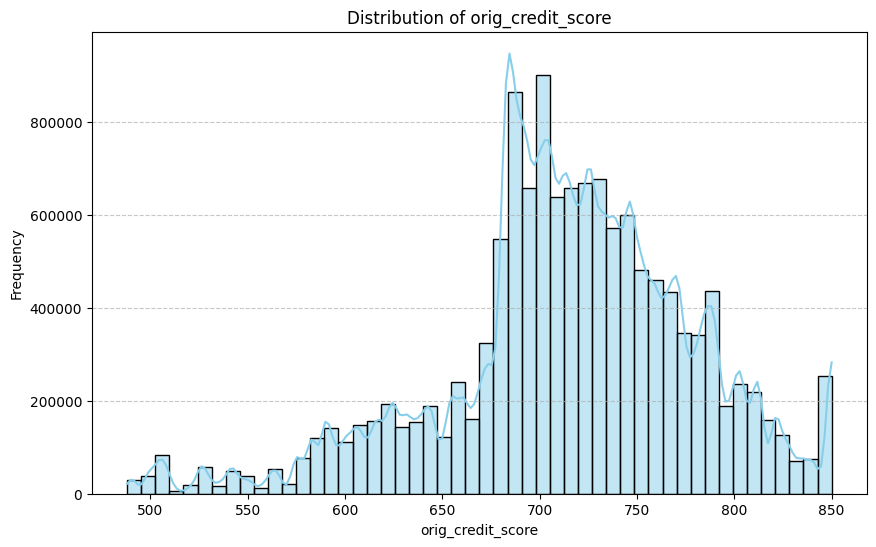

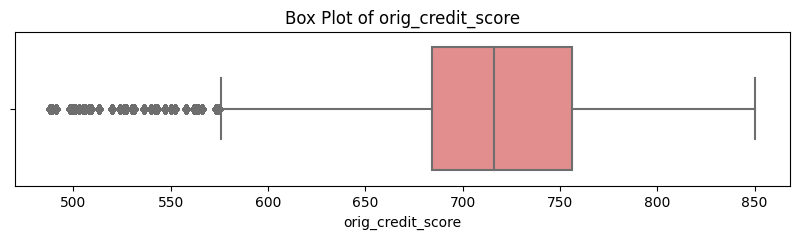

c:\Users\jseba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


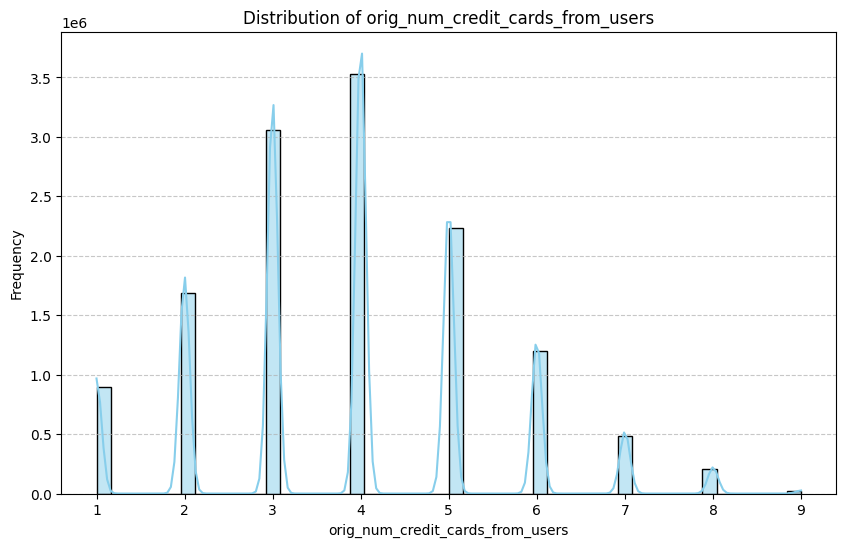

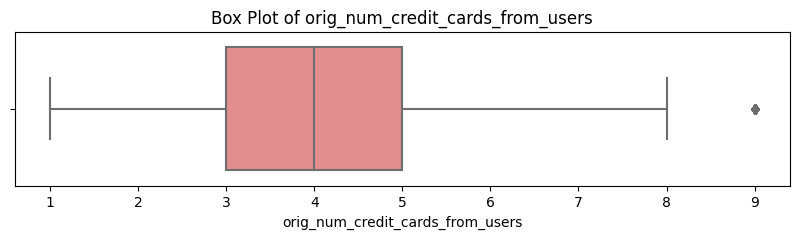


Skipping distribution analysis for 'credit_limit' as it's not found in the merged dataset.

Skipping distribution analysis for 'num_cards_issued' as it's not found in the merged dataset.


--- Correlation Matrix of Numerical Features and Fraud ---
                                    amount  orig_num_cards_from_cards  \
amount                            1.000000                  -0.016886   
orig_num_cards_from_cards        -0.016886                   1.000000   
orig_age                         -0.013088                   0.388371   
orig_latitude                     0.010919                   0.011567   
orig_longitude                    0.007819                  -0.080490   
orig_per_capita_income            0.125649                   0.016493   
orig_yearly_income                0.123787                  -0.039135   
orig_total_debt                   0.059398                  -0.204716   
orig_credit_score                -0.021425                   0.241952   
orig_num_credit_cards

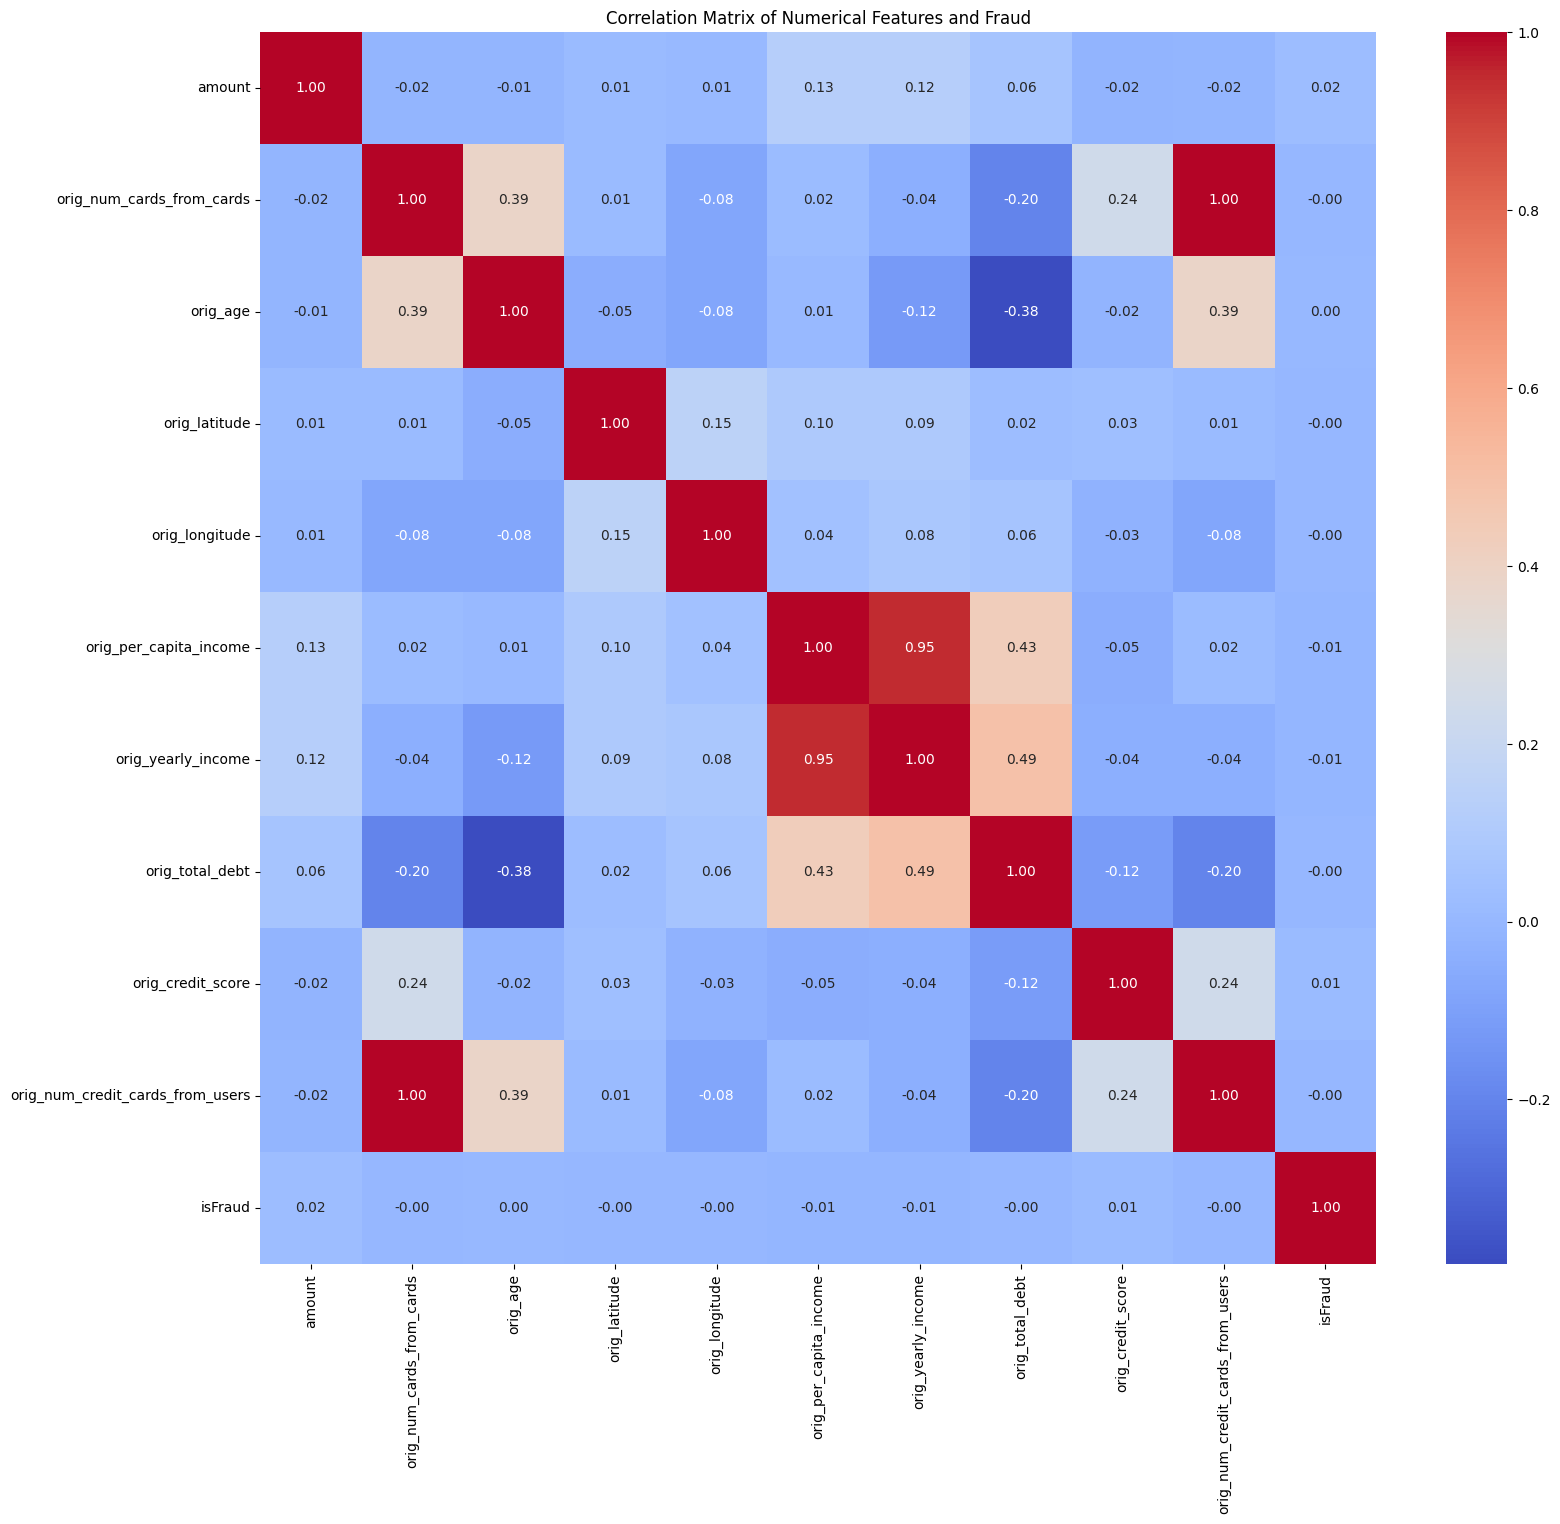


--- Extended Data Analysis Complete ---

Merged dataset saved to: merged_transactions_data.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# IMPORTANT: Replace these paths if your files are not in the same directory.
transactions_file_path = 'transactions_data.csv'
cards_file_path = 'cards_data.csv'
users_file_path = 'users_data.csv'
output_file_path = 'merged_transactions_data.csv' # Path to save the final merged dataset

# --- Load the Datasets ---
print(f"Loading dataset from: {transactions_file_path}\n")
try:
    df_transactions = pd.read_csv(transactions_file_path)
    print("Transactions dataset loaded successfully!\n")
except FileNotFoundError:
    print(f"Error: The file '{transactions_file_path}' was not found. Please ensure the CSV file is in the correct directory.")
    print("You can download the dataset from: https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets")
    exit()

print(f"Loading dataset from: {cards_file_path}\n")
try:
    df_cards = pd.read_csv(cards_file_path)
    print("Cards data loaded successfully!\n")
except FileNotFoundError:
    print(f"Error: The file '{cards_file_path}' was not found.")
    exit()

print(f"Loading dataset from: {users_file_path}\n")
try:
    df_users = pd.read_csv(users_file_path)
    print("Users data loaded successfully!\n")
except FileNotFoundError:
    print(f"Error: The file '{users_file_path}' was not found.")
    exit()

print("\n" + "="*80 + "\n")

# --- EDA for Users Data ---
print("--- Initial Data Overview: Users Data ---")
print(df_users.head())
print("\nUsers Data Info:")
df_users.info()
print("\nUsers Data Descriptive Statistics:")
print(df_users.describe(include='all'))
print("\nMissing Values in Users Data:")
print(df_users.isnull().sum())

print("\nActual Columns in Users Data:")
print(df_users.columns) # This line will show you all available columns in df_users

# Conditionally print value counts for 'gender'
if 'gender' in df_users.columns:
    print("\nUnique Genders in Users Data:")
    print(df_users['gender'].value_counts())
else:
    print("\n'gender' column not found in Users Data.")

print("\n" + "="*80 + "\n")

# --- EDA for Cards Data ---
print("--- Initial Data Overview: Cards Data ---")
print(df_cards.head())
print("\nCards Data Info:")
df_cards.info()
print("\nCards Data Descriptive Statistics:")
print(df_cards.describe(include='all'))
print("\nMissing Values in Cards Data:")
print(df_cards.isnull().sum())
print("\nUnique Card Types in Cards Data:")
print(df_cards['card_type'].value_counts())
print("\n" + "="*80 + "\n")

# --- Feature Engineering from Cards Data ---
print("--- Deriving features from Cards Data ---")

# 1. Number of cards per user
user_num_cards = df_cards.groupby('client_id').size().reset_index(name='num_cards')
print("\nNumber of cards per user (first 5 rows):")
print(user_num_cards.head())

# 2. Most frequent card type per user
def get_most_common(series):
    mode_val = series.mode()
    return mode_val[0] if not mode_val.empty else np.nan

user_most_common_card_type = df_cards.groupby('client_id')['card_type'].agg(get_most_common).reset_index(name='most_common_card_type')
print("\nMost common card type per user (first 5 rows):")
print(user_most_common_card_type.head())

# Merge these new card features into a single DataFrame for easier merging with transactions
df_card_features = pd.merge(user_num_cards, user_most_common_card_type, on='client_id', how='left')
print("\nCombined Card Features per User (first 5 rows):")
print(df_card_features.head())
print("\n" + "="*80 + "\n")

# --- Merging Transactions with User and Card Data ---
print("--- Actual Columns in Transactions Data ---")
print(df_transactions.columns)

# Start with a copy of df_transactions and explicitly create 'orig_user_id' from its 'client_id'
df_merged = df_transactions.copy()
df_merged['orig_user_id'] = df_merged['client_id'] # Use 'client_id' from transactions as the base for originating user ID

# Merge with df_users using the new 'orig_user_id'
df_merged = pd.merge(df_merged, df_users,
                     left_on='orig_user_id', right_on='id', # 'orig_user_id' exists in df_merged, 'id' in df_users
                     how='left')

# Drop the redundant 'id' column that came from df_users after the merge, as 'orig_user_id' is now the canonical user ID
if 'id' in df_merged.columns:
    df_merged.drop(columns=['id'], inplace=True)

# Rename the other columns that came from df_users
df_merged.rename(columns={'current_age': 'orig_age',
                          'gender': 'orig_gender',
                          'address': 'orig_address',
                          'latitude': 'orig_latitude',
                          'longitude': 'orig_longitude',
                          'per_capita_income': 'orig_per_capita_income',
                          'yearly_income': 'orig_yearly_income',
                          'total_debt': 'orig_total_debt',
                          'credit_score': 'orig_credit_score',
                          'num_credit_cards': 'orig_num_credit_cards_from_users', # Renamed to avoid clash if num_cards also comes from cards data
                          'retirement_age': 'orig_retirement_age',
                          'birth_year': 'orig_birth_year',
                          'birth_month': 'orig_birth_month',
                          }, inplace=True)


# Merge originating user's card features
# 'orig_user_id' is now definitely in df_merged
df_merged = pd.merge(df_merged, df_card_features,
                     left_on='orig_user_id', right_on='client_id',
                     how='left')

# Rename the new columns from df_card_features for consistency
df_merged.rename(columns={'num_cards': 'orig_num_cards_from_cards', # Explicitly named to distinguish from num_credit_cards from users
                          'most_common_card_type': 'orig_most_common_card_type'}, inplace=True)

# Drop the 'client_id' column that came from df_card_features after its merge
if 'client_id' in df_merged.columns: # This 'client_id' is from df_card_features
    df_merged.drop(columns=['client_id'], inplace=True)

# Drop the original 'client_id' from transactions if 'orig_user_id' is preferred
# 'client_id' from df_transactions is now effectively duplicated by 'orig_user_id'
if 'client_id' in df_merged.columns: # Check if the original 'client_id' from df_transactions still exists after all merges
    df_merged.drop(columns=['client_id'], inplace=True)


# --- Handle 'isFraud' column ---
# Based on the provided headers for transactions_data.csv, there is no 'isFraud' column directly.
# Assuming 'errors' column indicates fraud (e.g., if it's not null, it implies an error/potential fraud)
if 'errors' in df_merged.columns:
    df_merged['isFraud'] = df_merged['errors'].notna().astype(int) # 1 if there's an error, 0 otherwise
    print("\n'isFraud' column created based on 'errors' column.")
else:
    df_merged['isFraud'] = 0 # Default to 0 if no errors column or no fraud indication
    print("\nWarning: 'errors' column not found to derive 'isFraud'. 'isFraud' column defaulted to 0.")


# --- Removed analysis for 'type' column ---
# As 'type' column is NOT in the provided transactions_data.csv headers.
print("\n'type' column not found in Transactions Data (based on provided headers). Skipping type analysis.")

print("\n" + "="*80 + "\n")

print("--- Merged Dataset Head (Transactions + Originating User Data + Originating Card Features) ---")
print(df_merged.head())
print("\n" + "="*80 + "\n")

print("--- Merged Dataset Information ---")
df_merged.info()
print("\n" + "="*80 + "\n")

print("--- Merged Dataset Descriptive Statistics ---")
print(df_merged.describe(include='all')) # Include all to see stats for new object columns
print("\n" + "="*80 + "\n")

# --- Check for Missing Values in Merged Dataset ---
print("--- Missing Values Count in Merged Dataset ---")
missing_values_merged = df_merged.isnull().sum()
if missing_values_merged.sum() == 0:
    print("No missing values found in the merged dataset.")
else:
    print(missing_values_merged[missing_values_merged > 0])
print("\n" + "="*80 + "\n")


# --- Target Variable Analysis: 'isFraud' ---
if 'isFraud' in df_merged.columns:
    print("--- Distribution of 'isFraud' (Target Variable) ---")
    fraud_counts = df_merged['isFraud'].value_counts()
    print(fraud_counts)
    print("\nPercentage of fraudulent transactions:")
    print(df_merged['isFraud'].value_counts(normalize=True) * 100)

    plt.figure(figsize=(8, 6))
    sns.countplot(x='isFraud', data=df_merged, palette='viridis')
    plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
    plt.xlabel('Is Fraudulent (0: No, 1: Yes)')
    plt.ylabel('Number of Transactions')
    plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Warning: 'isFraud' column still not available for analysis.")

print("\n" + "="*80 + "\n")

# --- New Analysis: Fraud by Originating Gender ---
if 'orig_gender' in df_merged.columns and 'isFraud' in df_merged.columns:
    print("--- Fraudulent Transactions by Originating Gender ---")
    fraud_by_orig_gender = df_merged.groupby('orig_gender')['isFraud'].sum().sort_values(ascending=False)
    print(fraud_by_orig_gender)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=fraud_by_orig_gender.index, y=fraud_by_orig_gender.values, palette='cool_r')
    plt.title('Number of Fraudulent Transactions by Originating Gender')
    plt.xlabel('Originating Gender')
    plt.ylabel('Number of Transactions')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\nProportion of Fraud within each Originating Gender:")
    orig_gender_fraud_proportion = df_merged.groupby('orig_gender')['isFraud'].mean().sort_values(ascending=False) * 100
    print(orig_gender_fraud_proportion)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=orig_gender_fraud_proportion.index, y=orig_gender_fraud_proportion.values, palette='rocket')
    plt.title('Percentage of Fraudulent Transactions by Originating Gender')
    plt.xlabel('Originating Gender')
    plt.ylabel('Percentage of Fraud (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
elif 'orig_gender' not in df_merged.columns:
    print("\n'orig_gender' column not found in merged data. Skipping originating gender analysis.")
elif 'isFraud' not in df_merged.columns:
    print("\n'isFraud' column not found. Skipping originating gender fraud analysis.")


print("\n" + "="*80 + "\n")

# --- New Analysis: Fraud by Originating Number of Cards (from df_card_features) ---
if 'orig_num_cards_from_cards' in df_merged.columns and 'isFraud' in df_merged.columns:
    print("--- Fraud by Originating Number of Cards (from cards_data.csv) ---")
    # Display distribution of originating number of cards
    plt.figure(figsize=(10, 6))
    # Ensure numerical conversion for plotting
    plot_data = df_merged['orig_num_cards_from_cards'].dropna()
    if not plot_data.empty:
        sns.histplot(plot_data, kde=True, bins=range(int(plot_data.min()), int(plot_data.max()) + 2), color='purple')
        plt.title('Distribution of Originating Number of Cards (from cards_data.csv)')
        plt.xlabel('Number of Cards (Originating User)')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Relationship with fraud using box plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='isFraud', y='orig_num_cards_from_cards', data=df_merged, palette='viridis')
        plt.title('Originating Number of Cards (from cards_data.csv) vs. Fraud')
        plt.xlabel('Is Fraudulent')
        plt.ylabel('Number of Cards (Originating User)')
        plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\nSkipping distribution and box plot for 'orig_num_cards_from_cards' as it contains no valid numerical data after cleaning.")
elif 'orig_num_cards_from_cards' not in df_merged.columns:
    print("\n'orig_num_cards_from_cards' column not found in merged data. Skipping originating number of cards analysis.")
elif 'isFraud' not in df_merged.columns:
    print("\n'isFraud' column not found. Skipping originating number of cards fraud analysis.")

print("\n" + "="*80 + "\n")

# --- New Analysis: Fraud by Originating Most Common Card Type ---
if 'orig_most_common_card_type' in df_merged.columns and 'isFraud' in df_merged.columns:
    print("--- Fraud by Originating Most Common Card Type ---")
    # Count plot of originating most common card type, separated by fraud
    plt.figure(figsize=(12, 7))
    sns.countplot(x='orig_most_common_card_type', hue='isFraud', data=df_merged, palette='Dark2')
    plt.title('Originating Most Common Card Type vs. Fraud')
    plt.xlabel('Most Common Card Type (Originating User)')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Is Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nProportion of Fraud within each Originating Most Common Card Type:")
    orig_card_type_fraud_proportion = df_merged.groupby('orig_most_common_card_type')['isFraud'].mean().sort_values(ascending=False) * 100
    print(orig_card_type_fraud_proportion)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=orig_card_type_fraud_proportion.index, y=orig_card_type_fraud_proportion.values, palette='coolwarm')
    plt.title('Percentage of Fraudulent Transactions by Originating Most Common Card Type')
    plt.xlabel('Originating Most Common Card Type')
    plt.ylabel('Percentage of Fraud (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
elif 'orig_most_common_card_type' not in df_merged.columns:
    print("\n'orig_most_common_card_type' column not found in merged data. Skipping originating most common card type analysis.")
elif 'isFraud' not in df_merged.columns:
    print("\n'isFraud' column not found. Skipping originating most common card type fraud analysis.")

print("\n" + "="*80 + "\n")

# --- Numerical Features Distribution ---
# Updated numerical_features list to include all relevant numerical features
numerical_features = ['amount', 'orig_num_cards_from_cards', 'orig_age', 'orig_latitude', 'orig_longitude',
                      'orig_per_capita_income', 'orig_yearly_income', 'orig_total_debt', 'orig_credit_score', 'orig_num_credit_cards_from_users',
                      'credit_limit', 'num_cards_issued']

# Columns that are expected to contain currency symbols or need aggressive cleaning
columns_to_clean = ['amount', 'orig_per_capita_income', 'orig_yearly_income', 'orig_total_debt', 'orig_credit_score', 'credit_limit']

# Apply cleaning and numeric conversion to all numerical columns at once before plotting/correlation
for col in numerical_features:
    if col in df_merged.columns:
        # Check if the column needs cleaning of currency symbols
        if col in columns_to_clean:
            # Convert to string first, then remove '$' and '-' from the beginning, then convert to numeric
            # Using str.replace to remove '$' and then str.lstrip('-') to handle leading '-'
            df_merged[col] = df_merged[col].astype(str).str.replace('$', '', regex=False).str.lstrip('-').str.replace(',', '', regex=False)
            # Re-convert to numeric. If it becomes NaN, it means there were other non-numeric chars
            df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')
        else:
            # For other numerical columns, just coerce to numeric
            df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')


print("--- Distribution of Numerical Features ---")
for col in numerical_features:
    if col in df_merged.columns: # Check if column exists in case of missing data for some users
        plot_data = df_merged[col].dropna() # Now plot_data will be numeric

        if not plot_data.empty: # Only plot if there's data after dropping NaNs
            plt.figure(figsize=(10, 6))
            sns.histplot(plot_data, kde=True, bins=50, color='skyblue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            # Box plot to show outliers
            plt.figure(figsize=(10, 2))
            sns.boxplot(x=plot_data, color='lightcoral') # Pass the numerical series to x
            plt.title(f'Box Plot of {col}')
            plt.xlabel(col)
            plt.show()
        else:
            print(f"\nSkipping distribution and box plot for '{col}' as it contains no valid numerical data after cleaning.")
    else:
        print(f"\nSkipping distribution analysis for '{col}' as it's not found in the merged dataset.")


print("\n" + "="*80 + "\n")

# --- Correlation Matrix (for numerical features including new ones) ---
print("--- Correlation Matrix of Numerical Features and Fraud ---")
# Filter numerical features that are actually in the merged dataframe
current_numerical_features = [col for col in numerical_features if col in df_merged.columns]
if 'isFraud' in df_merged.columns and 'isFraud' not in current_numerical_features:
    current_numerical_features.append('isFraud')

if len(current_numerical_features) > 1: # Ensure there are at least two numerical columns to compute correlation
    # Drop rows with NaNs only for correlation calculation to prevent issues, but keep original for other analysis
    correlation_df = df_merged[current_numerical_features].dropna()

    if not correlation_df.empty:
        correlation_matrix = correlation_df.corr()
        print(correlation_matrix)

        plt.figure(figsize=(18, 16)) # Increased figure size for more features
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Numerical Features and Fraud')
        plt.show()
    else:
        print("Not enough valid numerical data after cleaning to compute a correlation matrix.")
else:
    print("Not enough numerical features in the merged dataset to compute a correlation matrix.")


print("\n--- Extended Data Analysis Complete ---")

# --- Save the merged dataset to a new CSV file ---
df_merged.to_csv(output_file_path, index=False)
print(f"\nMerged dataset saved to: {output_file_path}")


In [14]:
# Check unique values and their counts for the 'isFraud' column
if 'isFraud' in df_merged.columns:
    print("--- Possible values and counts for 'isFraud' ---")
    print(df_merged['isFraud'].value_counts())
    print("\n--- Percentage of each value in 'isFraud' ---")
    print(df_merged['isFraud'].value_counts(normalize=True) * 100)
else:
    print("The 'isFraud' column does not exist in the merged DataFrame.")

--- Possible values and counts for 'isFraud' ---
isFraud
0    13094522
1      211393
Name: count, dtype: int64

--- Percentage of each value in 'isFraud' ---
isFraud
0    98.411286
1     1.588714
Name: proportion, dtype: float64
